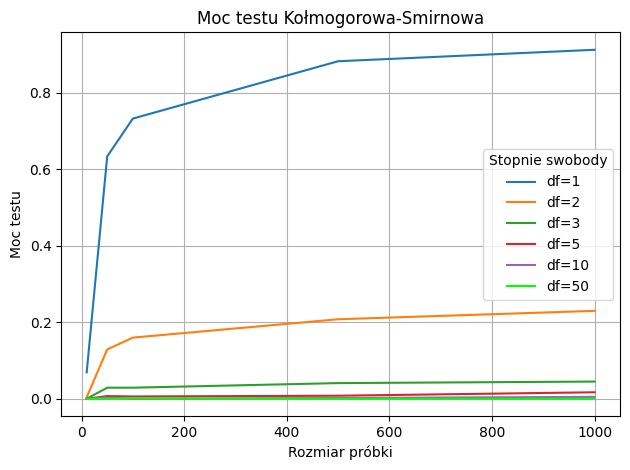

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, chi2

# Parametry symulacji
liczba_symulacji = 1000
rozmiary_probek = [10, 50, 100, 500, 1000]
stopnie_swobody = [1, 2, 3, 5, 10, 50]

# Przechowuje wyniki
wyniki = {}

# Pętla przez różne rozmiary próbek i stopnie swobody
for df in stopnie_swobody:
    for n in rozmiary_probek:
        wartosci_p = []
        for _ in range(liczba_symulacji):
            # Generowanie próbek z rozkładu chi-kwadrat
            próbka1 = chi2.rvs(df, size=n)
            próbka2 = chi2.rvs(df, size=n)
            
            # Przesunięcie próbek, aby miały tę samą wartość oczekiwaną
            próbka1 = próbka1 - np.mean(próbka1) + df
            próbka2 = próbka2 - np.mean(próbka2) + df
            
            # Przeprowadzenie testu Kołmogorowa-Smirnowa
            _, wartosc_p = ks_2samp( próbka1, próbka2)
            wartosci_p.append(wartosc_p)
        
        # Obliczenie mocy testu
        moc = np.mean([p < 0.05 for p in wartosci_p])
        
        # Zapisanie wyników
        wyniki[(df, n)] = moc

# Wyświetlanie wyników na wykresie
for i, df in enumerate(stopnie_swobody):
    moce = [wyniki[(df, n)] for n in rozmiary_probek]
    if i == len(stopnie_swobody) - 1:  # dla ostatniego stopnia swobody
        plt.plot(rozmiary_probek, moce, label=f'df={df}', color='lime')  # jaskrawozielony kolor
    else:
        plt.plot(rozmiary_probek, moce, label=f'df={df}')
plt.xlabel('Rozmiar próbki')
plt.ylabel('Moc testu')
plt.title('Moc testu Kołmogorowa-Smirnowa')
plt.legend(title='Stopnie swobody')
plt.grid(True)
plt.tight_layout()
plt.show()


W przeprowadzonym badaniu symulowano test Kołmogorowa-Smirnowa dla różnych rozkładów chi-kwadrat z różnymi stopniami swobody. Test Kołmogorowa-Smirnowa jest nieparametrycznym testem używanym do porównywania dwóch próbek danych. W tym przypadku, próbki były generowane z rozkładu chi-kwadrat, który jest rodzajem rozkładu prawdopodobieństwa.

Rozmiary próbek wynosiły 10, 50, 100, 500 i 1000, a stopnie swobody rozkładu chi-kwadrat wynosiły 1, 2, 3, 5, 10 i 50. Dla każdej kombinacji rozmiaru próbki i stopni swobody przeprowadzono 1000 symulacji.
W każdej symulacji generowano dwie próbki danych z rozkładu chi-kwadrat, a następnie przesuwano je tak, aby miały tę samą wartość oczekiwaną. Następnie przeprowadzano test Kołmogorowa-Smirnowa na tych próbkach i obliczano p-wartość.
Moc testu, czyli prawdopodobieństwo odrzucenia fałszywej hipotezy zerowej, obliczano jako średnią liczbę symulacji, w których p-wartość była mniejsza od 0,05.
Wyniki przedstawiono na wykresie, który pokazuje moc testu w zależności od rozmiaru próbki i stopni swobody. Z wykresu można zauważyć, że moc testu generalnie rośnie wraz ze wzrostem rozmiaru próbki. Można to interpretować jako większą zdolność testu do wykrywania różnic między próbkami, gdy próbki są większe. Ponadto, dla danego rozmiaru próbki, moc testu różni się w zależności od stopni swobody rozkładu chi-kwadrat. To sugeruje, że charakterystyki rozkładu danych mogą wpływać na moc testu Kołmogorowa-Smirnowa. 
Ostatnia linia na wykresie, reprezentująca stopnie swobody równego 50, jest wyróżniona jaskrawozielonym kolorem dla lepszej widoczności. Aby podkreślić to, że jest praktycznie bliska zeru.